In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [6]:
df = pd.read_csv('datos.csv')

C:\Users\Vero\AppData\Local\Temp\ipykernel_5272\2859805775.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,11,12,13,14,18,19,20,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datos.csv')


Analisis general de la informacion.

In [7]:
print(df.shape)
df.head()

(90855, 27)


,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,id_collection,name_collection,poster_path_collection,backdrop_path_collection,release_year,return,cast,crew,actors,director
0,30000000.0,"Animation, Comedy, Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,US,1995-10-30,373554033.0,...,10194.0,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,1995.0,12.45,NaN,NaN,NaN,NaN
1,65000000.0,"Adventure, Fantasy, Family",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",US,1995-12-15,262797249.0,...,NaN,NaN,NaN,NaN,1995.0,4.04,NaN,NaN,NaN,NaN
2,0.0,"Romance, Comedy",15602,en,A family wedding reignites the ancient feud be...,11.7129,"Warner Bros., Lancaster Gate",US,1995-12-22,0.0,...,119050.0,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,1995.0,0.00,NaN,NaN,NaN,NaN
3,16000000.0,"Comedy, Drama, Romance",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,US,1995-12-22,81452156.0,...,NaN,NaN,NaN,NaN,1995.0,5.09,NaN,NaN,NaN,NaN
4,0.0,Comedy,11862,en,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",US,1995-02-10,76578911.0,...,96871.0,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,1995.0,0.00,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90855 entries, 0 to 90854
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   budget                    45379 non-null  float64
 1   genres                    42995 non-null  object 
 2   id                        90855 non-null  object 
 3   original_language         45368 non-null  object 
 4   overview                  44438 non-null  object 
 5   popularity                45377 non-null  object 
 6   production_companies      33580 non-null  object 
 7   production_countries      39165 non-null  object 
 8   release_date              45376 non-null  object 
 9   revenue                   45379 non-null  float64
 10  runtime                   45130 non-null  float64
 11  spoken_languages          41608 non-null  object 
 12  status                    45296 non-null  object 
 13  tagline                   20398 non-null  object 
 14  title 

In [9]:
df.describe()

,budget,revenue,runtime,vote_average,vote_count,id_collection,release_year,return
count,4.537900e+04,4.537900e+04,45130.000000,45376.000000,45376.000000,4488.000000,45379.000000,4.537900e+04
mean,4.232325e+06,1.122936e+07,94.181675,5.624070,110.096439,184073.408868,1991.749510,6.599992e+02
std,1.743932e+07,6.438789e+07,38.341059,1.915423,491.742894,141630.530505,28.998404,7.469083e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000,86026.250000,1978.000000,0.000000e+00
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000,141531.500000,2001.000000,0.000000e+00
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000,294172.000000,2010.000000,0.000000e+00
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000,480160.000000,2020.000000,1.239638e+07


In [10]:
tipo_texto = df.select_dtypes(include=["object"]).columns
data_texto = df[tipo_texto]
data_texto.describe()

,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,name_collection,poster_path_collection,backdrop_path_collection,cast,crew,actors,director
count,42995,90855,45368,44438,45377,33580,39165,45376,41608,45296,20398,45376,4488,3945,3260,45476,45476,43058,44589
unique,4067,70670,92,44233,44142,22666,2388,17333,1930,6,20269,42196,1695,1403,1122,43019,44669,42182,18853
top,Drama,141971,en,No overview found.,1e-06,Metro-Goldwyn-Mayer (MGM),US,2008-01-01,en,Released,Based on a true story.,Cinderella,The Bowery Boys,/q6sA4bzMT9cK7EEmXYwt7PNrL5h.jpg,/foe3kuiJmg5AklhtD3skWbaTMf2.jpg,[],[],Georges Méliès,John Ford
freq,4998,6,32202,133,30,742,17846,136,22380,44936,7,11,29,29,29,2418,771,24,63


In [11]:
df.isnull().sum()

budget                      45476
genres                      47860
id                              0
original_language           45487
overview                    46417
popularity                  45478
production_companies        57275
production_countries        51690
release_date                45479
revenue                     45476
runtime                     45725
spoken_languages            49247
status                      45559
tagline                     70457
title                       45479
vote_average                45479
vote_count                  45479
id_collection               86367
name_collection             86367
poster_path_collection      86910
backdrop_path_collection    87595
release_year                45476
return                      45476
cast                        45379
crew                        45379
actors                      47797
director                    46266
dtype: int64

Mapa de calor

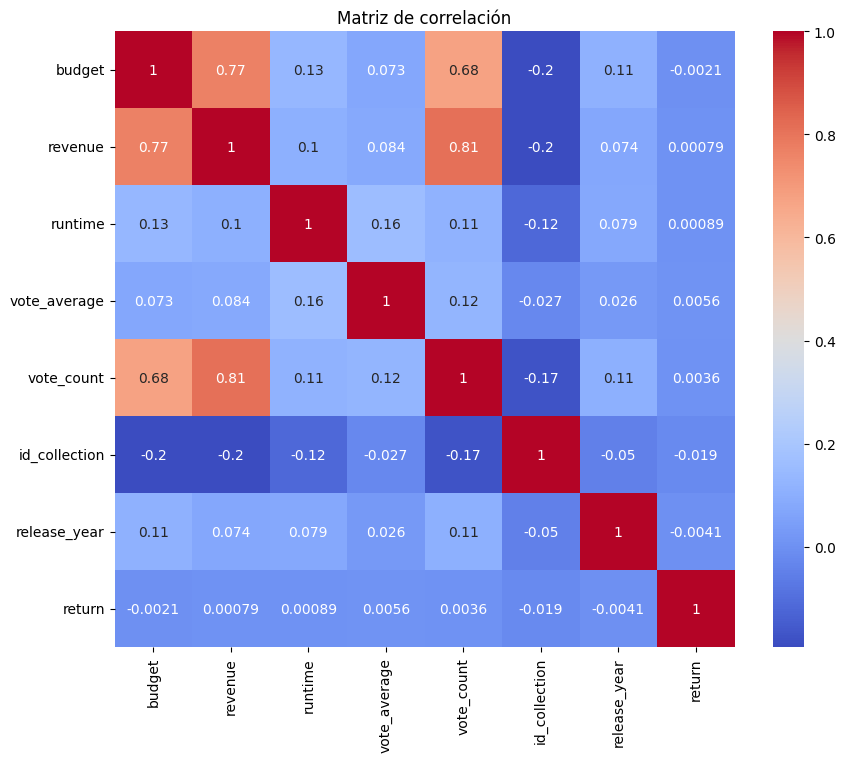

In [12]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Grafico de dispersion

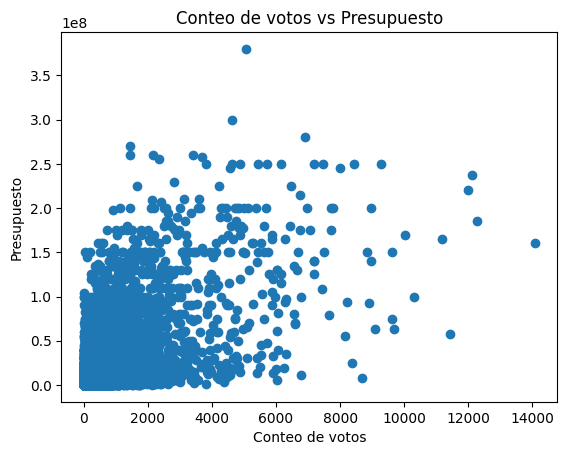

In [15]:
plt.scatter(df['vote_count'], df['budget'])
plt.xlabel('Conteo de votos')
plt.ylabel('Presupuesto')
plt.title('Conteo de votos vs Presupuesto')
plt.show()

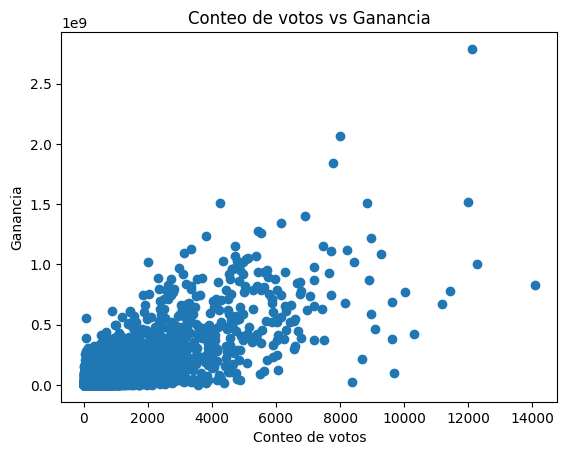

In [16]:
plt.scatter(df['vote_count'], df['revenue'])
plt.xlabel('Conteo de votos')
plt.ylabel('Ganancia')
plt.title('Conteo de votos vs Ganancia')
plt.show()

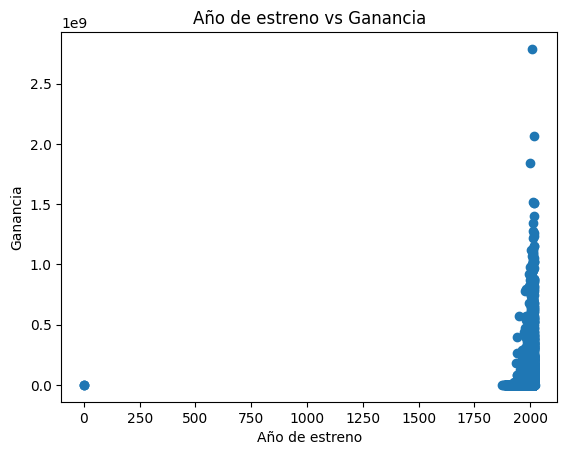

In [18]:
plt.scatter(df['release_year'], df['revenue'])
plt.xlabel('Año de estreno')
plt.ylabel('Ganancia')
plt.title('Año de estreno vs Ganancia')
plt.show()

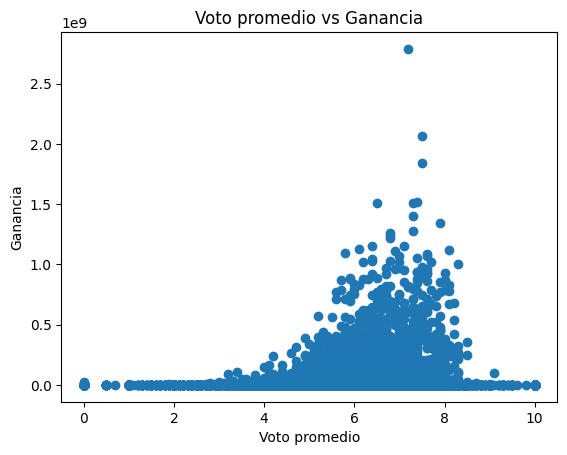

In [19]:
plt.scatter(df['vote_average'], df['revenue'])
plt.xlabel('Voto promedio')
plt.ylabel('Ganancia')
plt.title('Voto promedio vs Ganancia')
plt.show()

Grafico de barra

C:\Users\Vero\AppData\Local\Temp\ipykernel_5272\1101792966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux_genere['genre'] = df_aux_genere['genres'].str.split(',').str[0].str.strip()


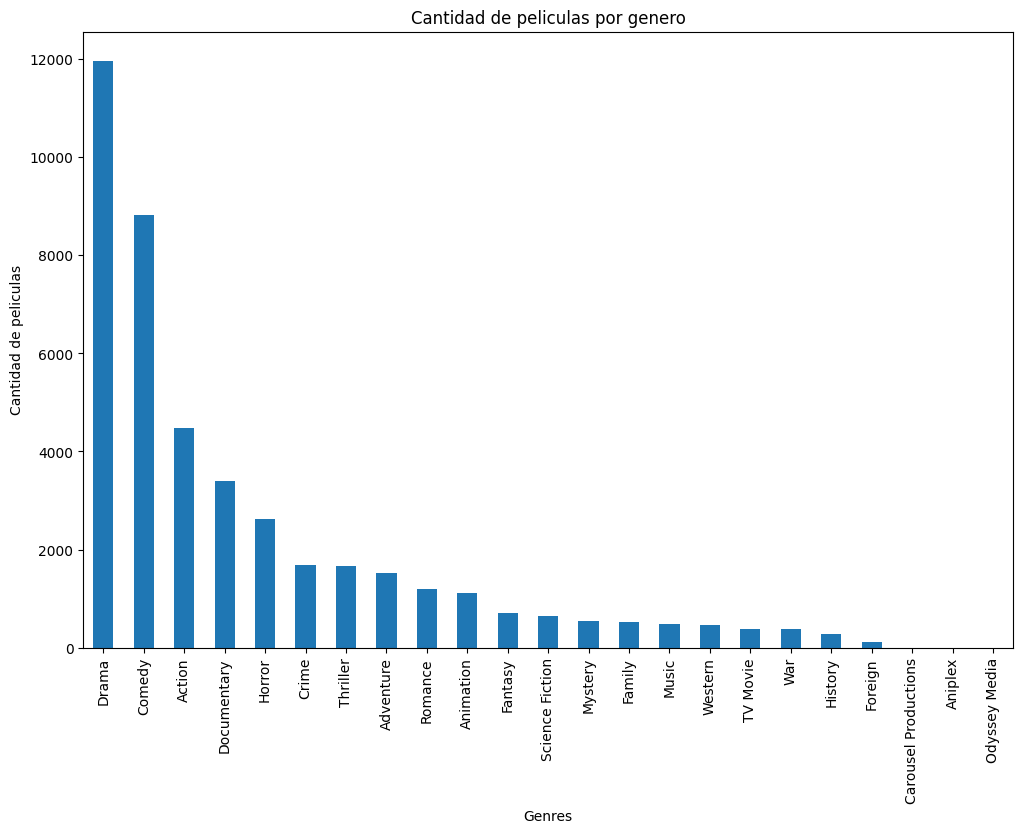

In [20]:
# Filtro del df original los generos unicos para evitar repeticiones y problemas al crear el grafico
df_aux_genere = df.dropna(subset=['genres'])
df_aux_genere['genre'] = df_aux_genere['genres'].str.split(',').str[0].str.strip()
movie_counts = df_aux_genere['genre'].value_counts()
# Creacion del grafico
plt.figure(figsize=(12, 8))
movie_counts.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Cantidad de peliculas')
plt.title('Cantidad de peliculas por genero')
plt.xticks(rotation=90)
plt.show()

Nubes de palabras

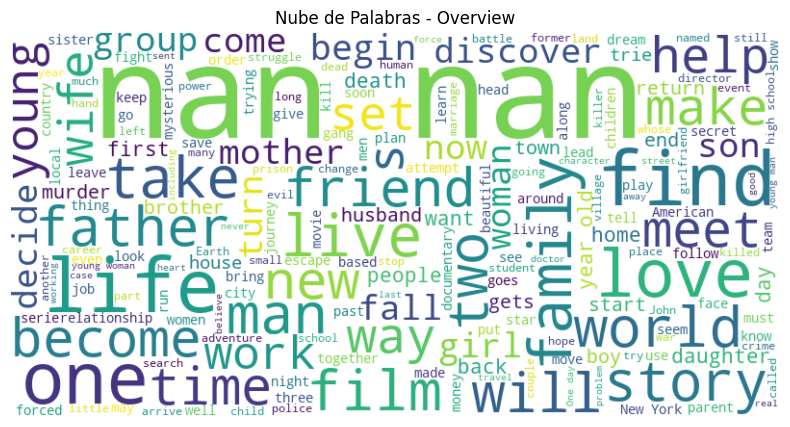

In [23]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['overview'].astype(str)))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Overview')
plt.show()

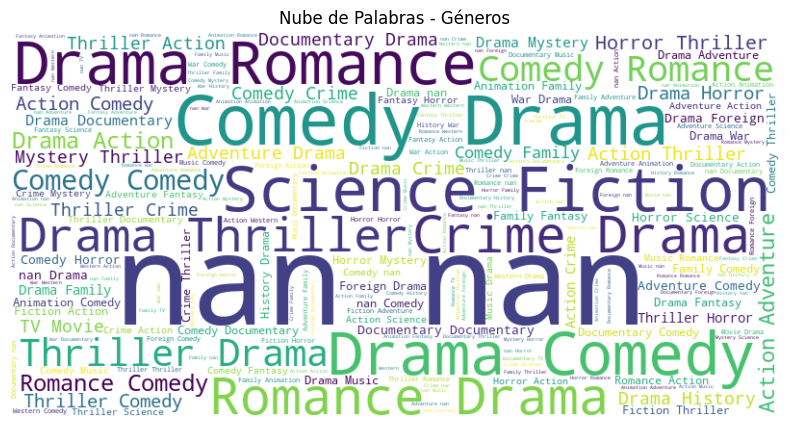

In [26]:
genres_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['genres'].astype(str)))
plt.figure(figsize=(10, 5))
plt.imshow(genres_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Géneros')
plt.show()

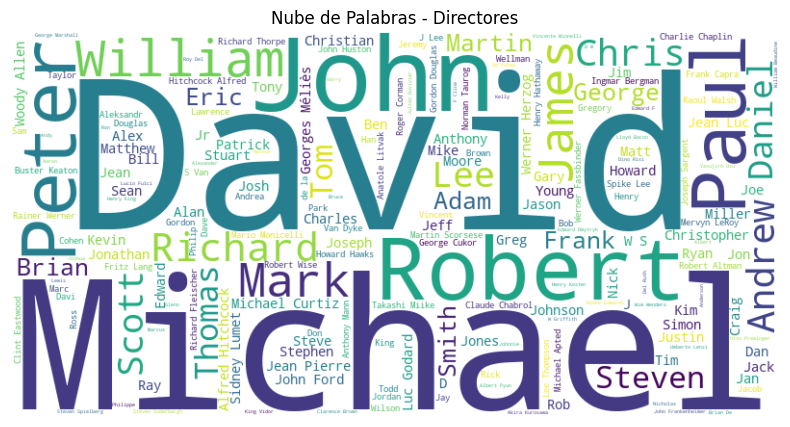

In [27]:
df['director'] = df['director'].fillna('')
directors_names = ' '.join(df['director'].astype(str))
# Crea y muestra la nube de palabras
directors_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(directors_names)
plt.figure(figsize=(10, 5))
plt.imshow(directors_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Directores')
plt.show()